In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
data = pd.read_csv('dataset/obesity.csv')

In [43]:
# Controlla la presenza di valori NaN in ogni colonna
missing_values = data.isnull().sum()

# Verifica e stampa il risultato per ogni colonna
for column, count in missing_values.items():
    if count > 0:
        print(f"La colonna '{column}' ha {count} valori mancanti.")
    else:
        print(f"La colonna '{column}' non ha valori mancanti.")


La colonna 'Gender' non ha valori mancanti.
La colonna 'Age' non ha valori mancanti.
La colonna 'Height' non ha valori mancanti.
La colonna 'Weight' non ha valori mancanti.
La colonna 'family_history' non ha valori mancanti.
La colonna 'FAVC' non ha valori mancanti.
La colonna 'FCVC' non ha valori mancanti.
La colonna 'NCP' non ha valori mancanti.
La colonna 'CAEC' non ha valori mancanti.
La colonna 'SMOKE' non ha valori mancanti.
La colonna 'CH2O' non ha valori mancanti.
La colonna 'SCC' non ha valori mancanti.
La colonna 'FAF' non ha valori mancanti.
La colonna 'TUE' non ha valori mancanti.
La colonna 'CALC' non ha valori mancanti.
La colonna 'MTRANS' non ha valori mancanti.
La colonna 'Obesity' non ha valori mancanti.


In [44]:
# Dizionario di mapping
mapping = {
    'no': 0,
    'Sometimes': 1,
    'Frequently': 2,
    'Always': 3
}

mapping_features =['CALC', 'CAEC']
# Applicare il mapping
data[mapping_features] = data[mapping_features].apply(lambda x: x.map(mapping))


In [45]:
# Dizionario di mapping
mapping = {
    'no': False,
    'yes': True
}

mapping_features =['SMOKE', 'family_history','FAVC', 'SCC']
# Applicare il mapping
data[mapping_features] = data[mapping_features].apply(lambda x: x.map(mapping))


In [46]:
# Stampa il numero di righe e colonne
print(data.shape)

# Estrarre solo il numero di righe
print(f"Numero di righe: {data.shape[0]}")

(2111, 17)
Numero di righe: 2111


In [47]:
# Dizionario di mapping
mapping = {
    'Insufficient_Weight': 'Sottopeso',
    'Normal_Weight': 'Normopeso',
    'Overweight_Level_I': 'Sovrappeso Livello I',
    'Overweight_Level_II': 'Sovrappeso Livello II',
    'Obesity_Type_I': 'Obesità Livello I',
    'Obesity_Type_II': 'Obesità Livello II',
    'Obesity_Type_III': 'Obesità Livello III'
}

mapping_features =['Obesity']
# Applicare il mapping
data[mapping_features] = data[mapping_features].apply(lambda x: x.map(mapping))


C:\Users\dswal\AppData\Local\Temp\ipykernel_4196\2435917653.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x="Obesity", data=data, palette="viridis", order=obesity_order)


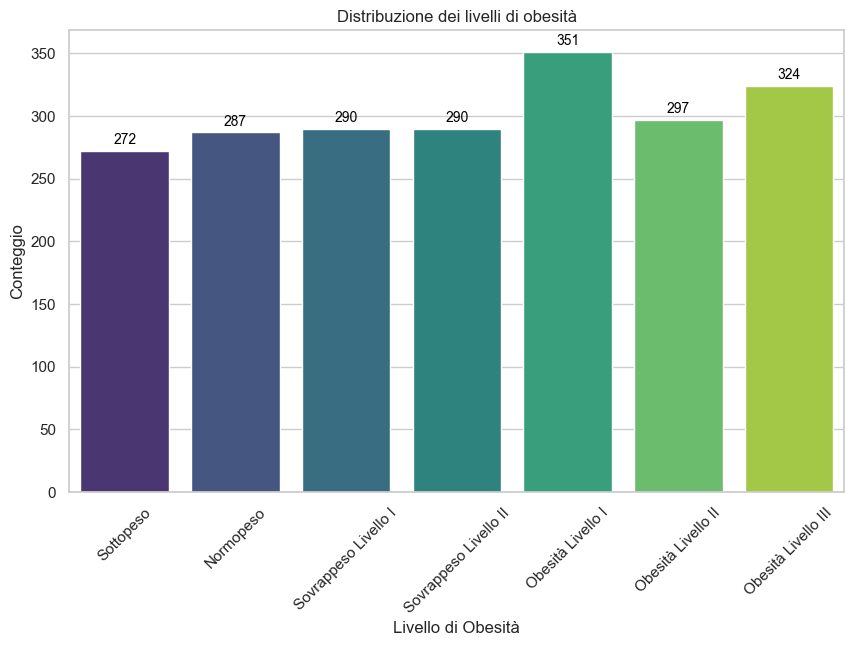

In [48]:
# Definisci l'ordine delle categorie per 'Obesity' con i nomi mappati
obesity_order = [
    'Sottopeso',
    "Normopeso",
    "Sovrappeso Livello I",
    "Sovrappeso Livello II",
    "Obesità Livello I",
    "Obesità Livello II",
    "Obesità Livello III"
]

# Configurazione di stile per Seaborn
sns.set(style="whitegrid")

# 1. Distribuzione dell'obesità
plt.figure(figsize=(10, 6))
ax = sns.countplot(x="Obesity", data=data, palette="viridis", order=obesity_order)
plt.title("Distribuzione dei livelli di obesità")
plt.xlabel("Livello di Obesità")
plt.ylabel("Conteggio")
plt.xticks(rotation=45)

# Aggiungi etichette sopra le barre
for p in ax.patches:
    height = int(p.get_height())
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()


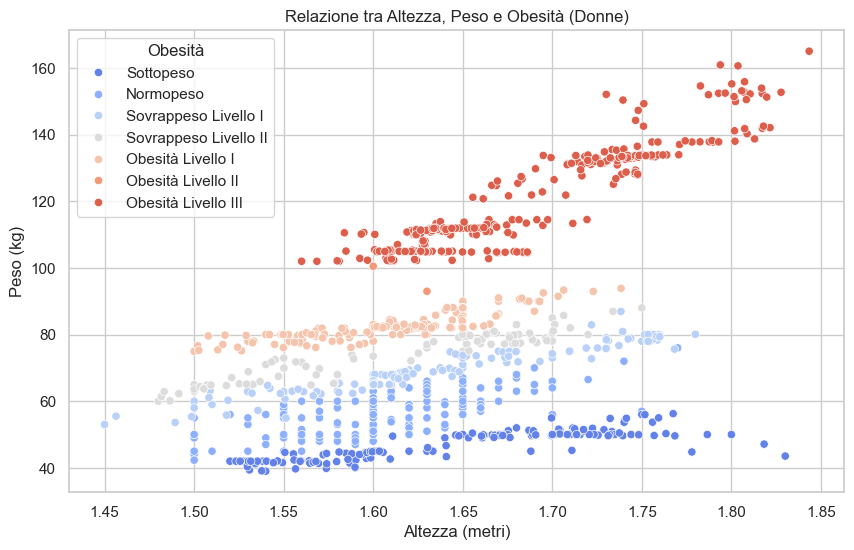

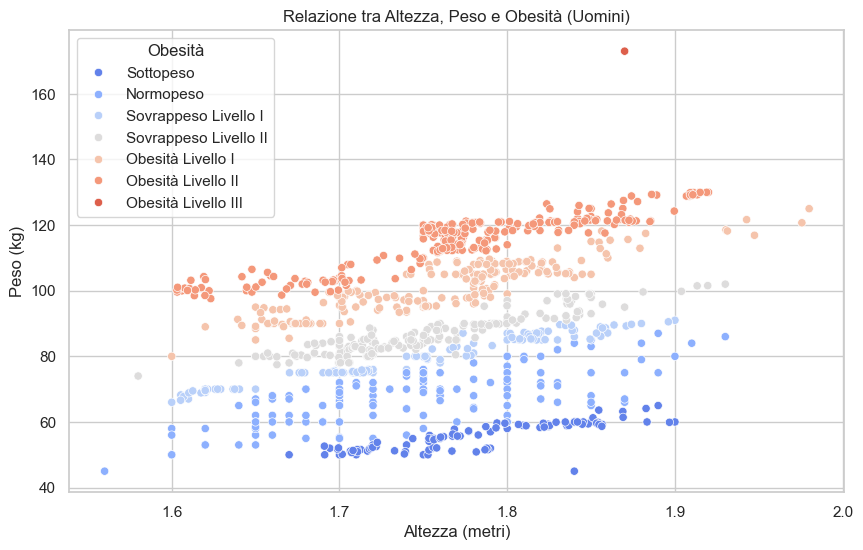

In [49]:

# Filtra i dati per genere
data_female = data[data["Gender"] == "Female"]
data_male = data[data["Gender"] == "Male"]

# 2a. Correlazione tra Peso e Altezza con i livelli di obesità (Female)
plt.figure(figsize=(10, 6))
sns.scatterplot(x="Height", y="Weight", hue="Obesity", data=data_female, palette="coolwarm", hue_order=obesity_order)
plt.title("Relazione tra Altezza, Peso e Obesità (Donne)")
plt.xlabel("Altezza (metri)")
plt.ylabel("Peso (kg)")
plt.legend(title="Obesità")
plt.show()

# 2b. Correlazione tra Peso e Altezza con i livelli di obesità (Male)
plt.figure(figsize=(10, 6))
sns.scatterplot(x="Height", y="Weight", hue="Obesity", data=data_male, palette="coolwarm", hue_order=obesity_order)
plt.title("Relazione tra Altezza, Peso e Obesità (Uomini)")
plt.xlabel("Altezza (metri)")
plt.ylabel("Peso (kg)")
plt.legend(title="Obesità")
plt.show()


C:\Users\dswal\AppData\Local\Temp\ipykernel_4196\1792104364.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Obesity", y="Age", data=data, palette="Set2", order=obesity_order)


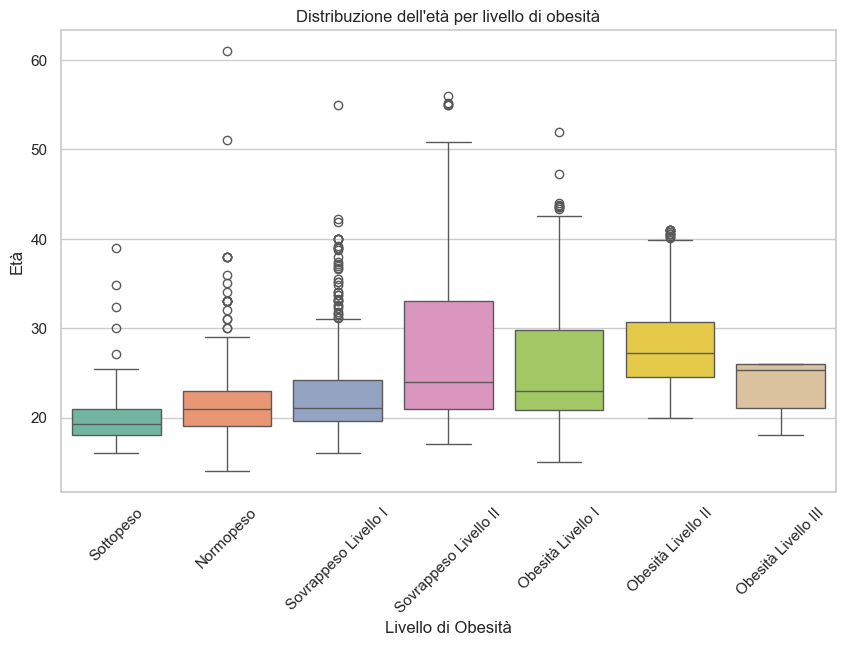

In [50]:
# 3. Boxplot: età in base ai livelli di obesità
plt.figure(figsize=(10, 6))
sns.boxplot(x="Obesity", y="Age", data=data, palette="Set2", order=obesity_order)
plt.title("Distribuzione dell'età per livello di obesità")
plt.xlabel("Livello di Obesità")
plt.ylabel("Età")
plt.xticks(rotation=45)
plt.show()


C:\Users\dswal\AppData\Local\Temp\ipykernel_4196\1458980911.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="Obesity", y="FAF", data=data, palette="muted", scale="width", order=obesity_order)
C:\Users\dswal\AppData\Local\Temp\ipykernel_4196\1458980911.py:3: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(x="Obesity", y="FAF", data=data, palette="muted", scale="width", order=obesity_order)


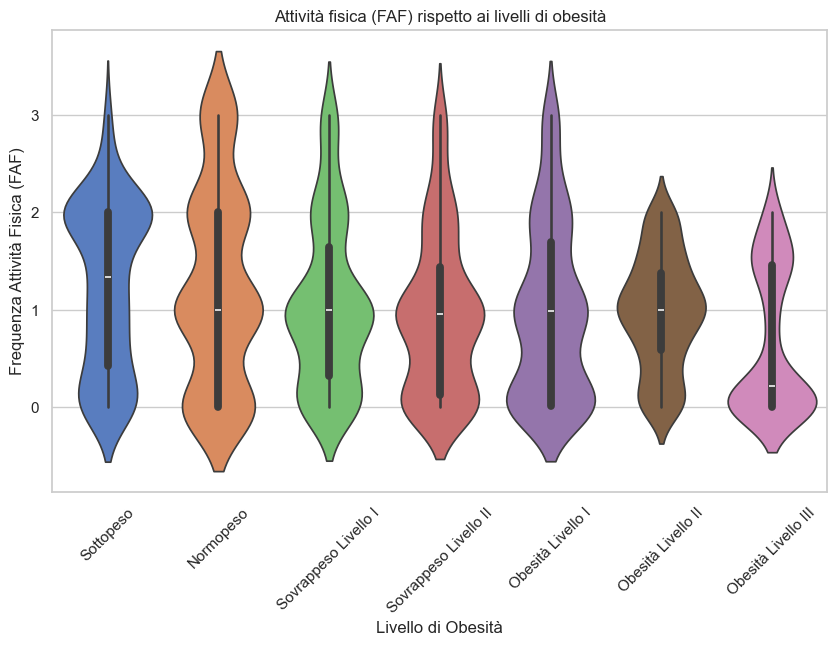

In [51]:

# 4. Frequenza dell'attività fisica (FAF) rispetto ai livelli di obesità
plt.figure(figsize=(10, 6))
sns.violinplot(x="Obesity", y="FAF", data=data, palette="muted", scale="width", order=obesity_order)
plt.title("Attività fisica (FAF) rispetto ai livelli di obesità")
plt.xlabel("Livello di Obesità")
plt.ylabel("Frequenza Attività Fisica (FAF)")
plt.xticks(rotation=45)
plt.show()


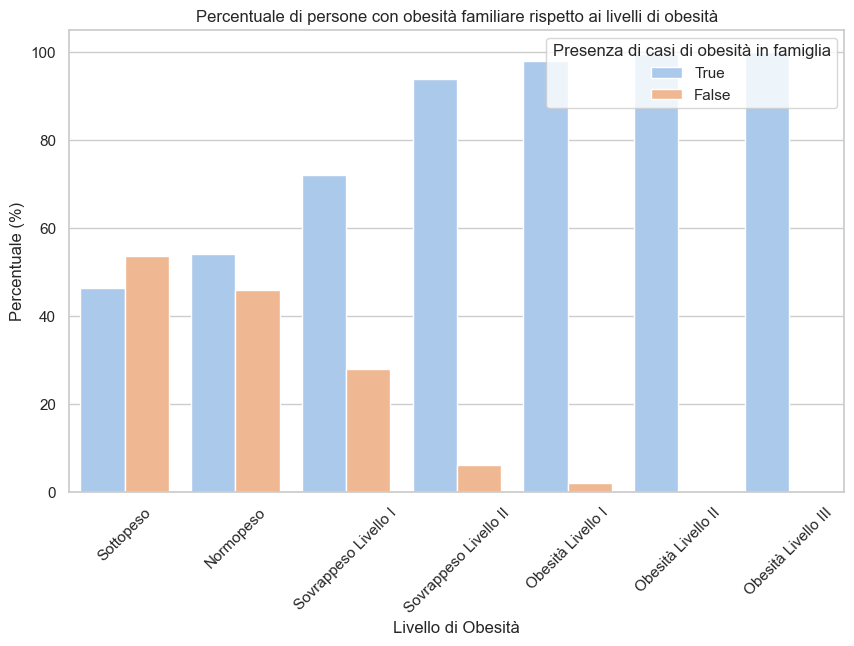

In [52]:
# Calcolo delle proporzioni per ogni combinazione di SCC e Obesity
data_grouped = data.groupby(["family_history", "Obesity"]).size().reset_index(name="Count")
data_total = data_grouped.groupby("Obesity")["Count"].sum().reset_index(name="Total")
data_merged = data_grouped.merge(data_total, on="Obesity")
data_merged["Percentage"] = data_merged["Count"] / data_merged["Total"] * 100

# Grafico a barre empicate percentuali
plt.figure(figsize=(10, 6))
sns.barplot(x="Obesity", y="Percentage", hue="family_history", data=data_merged, palette="pastel", hue_order=[True, False],order=obesity_order)
plt.title("Percentuale di persone con obesità familiare rispetto ai livelli di obesità")
plt.xlabel("Livello di Obesità")
plt.ylabel("Percentuale (%)")
plt.xticks(rotation=45)
plt.legend(title="Presenza di casi di obesità in famiglia", loc="upper right")
plt.show()

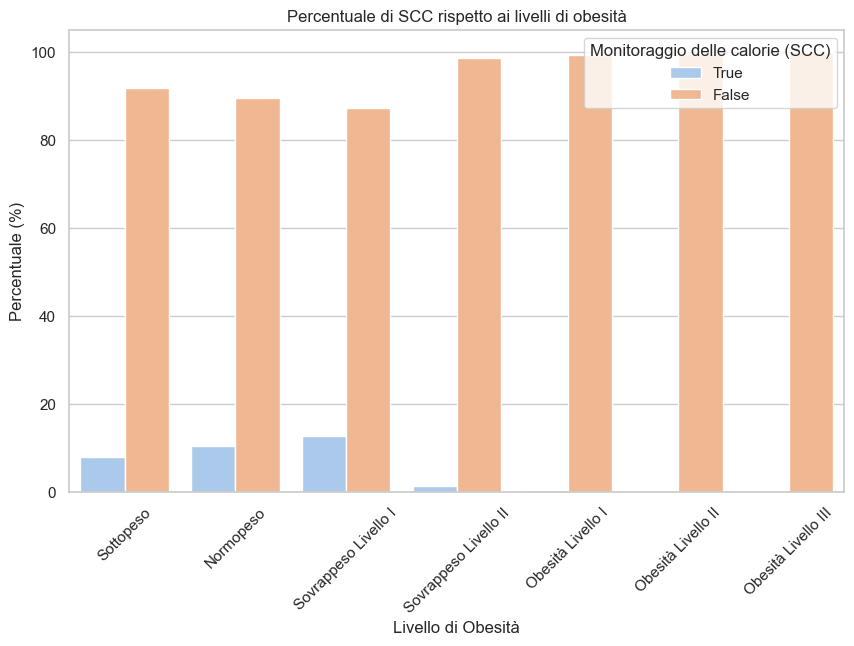

In [53]:
# Calcolo delle proporzioni per ogni combinazione di SCC e Obesity
data_grouped = data.groupby(["SCC", "Obesity"]).size().reset_index(name="Count")
data_total = data_grouped.groupby("Obesity")["Count"].sum().reset_index(name="Total")
data_merged = data_grouped.merge(data_total, on="Obesity")
data_merged["Percentage"] = data_merged["Count"] / data_merged["Total"] * 100

# Grafico a barre empicate percentuali
plt.figure(figsize=(10, 6))
sns.barplot(x="Obesity", y="Percentage", hue="SCC", data=data_merged, palette="pastel", hue_order=[True, False],order=obesity_order)
plt.title("Percentuale di SCC rispetto ai livelli di obesità")
plt.xlabel("Livello di Obesità")
plt.ylabel("Percentuale (%)")
plt.xticks(rotation=45)
plt.legend(title="Monitoraggio delle calorie (SCC)", loc="upper right")
plt.show()


C:\Users\dswal\AppData\Local\Temp\ipykernel_4196\1565960215.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Obesity", y="CH2O", data=data, palette="cool", order=obesity_order)


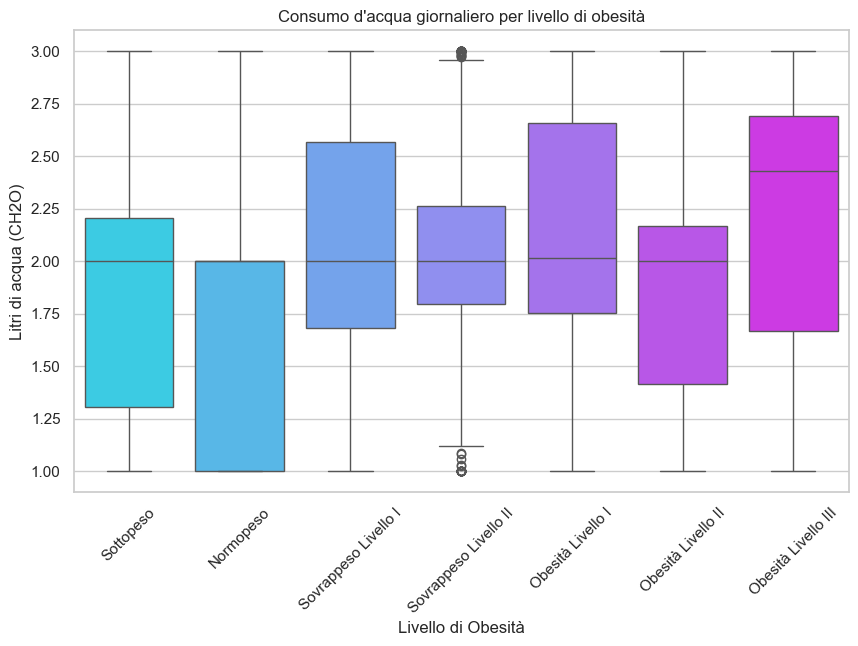

In [13]:

# 6. Consumo d'acqua (CH2O) per livello di obesità
plt.figure(figsize=(10, 6))
sns.boxplot(x="Obesity", y="CH2O", data=data, palette="cool", order=obesity_order)
plt.title("Consumo d'acqua giornaliero per livello di obesità")
plt.xlabel("Livello di Obesità")
plt.ylabel("Litri di acqua (CH2O)")
plt.xticks(rotation=45)
plt.show()
